# Decomposition

In [1]:
import EFGs
EFGs.__version__

'0.8.4'

In [2]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem
from EFGs import mol2frag, cleavage

In [3]:
from collections import Counter
import pickle

In [4]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [5]:
smi_df = pd.read_csv('data/GDSC/drug_smiles.csv')
smi_df

,name,CID,CanonicalSMILES,IsomericSMILES
0,SNX-2112,24772860,CC1(CC2=C(C(=O)C1)C(=NN2C3=CC(=C(C=C3)C(=O)N)N...,CC1(CC2=C(C(=O)C1)C(=NN2C3=CC(=C(C=C3)C(=O)N)N...
1,TPCA-1,9903786,C1=CC(=CC=C1C2=CC(=C(S2)NC(=O)N)C(=O)N)F,C1=CC(=CC=C1C2=CC(=C(S2)NC(=O)N)C(=O)N)F
2,Quizartinib,24889392,CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C...,CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C...
3,Tubastatin A,49850262,CN1CCC2=C(C1)C3=CC=CC=C3N2CC4=CC=C(C=C4)C(=O)NO,CN1CCC2=C(C1)C3=CC=CC=C3N2CC4=CC=C(C=C4)C(=O)NO
4,Trametinib,11707110,CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...,CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(...
...,...,...,...,...
218,RO-3306,11631681,C1=CC2=C(C=CC(=C2)C=C3C(=O)N=C(S3)NCC4=CC=CS4)...,C1=CC2=C(C=CC(=C2)/C=C\3/C(=O)N=C(S3)NCC4=CC=C...
219,Sepantronium bromide,11178236,CC1=[N+](C2=C(N1CCOC)C(=O)C3=CC=CC=C3C2=O)CC4=...,CC1=[N+](C2=C(N1CCOC)C(=O)C3=CC=CC=C3C2=O)CC4=...
220,Vismodegib,24776445,CS(=O)(=O)C1=CC(=C(C=C1)C(=O)NC2=CC(=C(C=C2)Cl...,CS(=O)(=O)C1=CC(=C(C=C1)C(=O)NC2=CC(=C(C=C2)Cl...
221,PI-103,9884685,C1COCCN1C2=NC(=NC3=C2OC4=C3C=CC=N4)C5=CC(=CC=C5)O,C1COCCN1C2=NC(=NC3=C2OC4=C3C=CC=N4)C5=CC(=CC=C5)O


In [6]:
drug_smi = smi_df['CanonicalSMILES'].values.tolist()
drug_smi

['CC1(CC2=C(C(=O)C1)C(=NN2C3=CC(=C(C=C3)C(=O)N)NC4CCC(CC4)O)C(F)(F)F)C',
 'C1=CC(=CC=C1C2=CC(=C(S2)NC(=O)N)C(=O)N)F',
 'CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C5=C(C=C(C=C5)OCCN6CCOCC6)SC4=N3',
 'CN1CCC2=C(C1)C3=CC=CC=C3N2CC4=CC=C(C=C4)C(=O)NO',
 'CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C3)I)F)C(=O)N(C(=O)N2C4=CC(=CC=C4)NC(=O)C)C5CC5',
 'CC(C)(C)OC(=O)NC1=CC=C(C=C1)C2=CC(=NO2)C(=O)NCCCCCCC(=O)NO',
 'CCN1C=C(C(=N1)C2=CC=C(C=C2)NC(=O)N(C)C)C3=C4C=C(NC4=NC=C3)C5=CC(=CC=C5)CN(C)C',
 'CCN1CCN(CC1)CC2=C(C=C(C=C2)NC(=O)C3=CC(=C(C=C3)C)OC4=C5C=CNC5=NC=C4)C(F)(F)F',
 'CC(CS(=O)(=O)C1=CC=C(C=C1)F)(C(=O)NC2=CC(=C(C=C2)C#N)C(F)(F)F)O',
 'CC1CCC2CC(C(=CC=CC=CC(CC(C(=O)C(C(C(=CC(C(=O)CC(OC(=O)C3CCCCN3C(=O)C(=O)C1(O2)O)C(C)CC4CCC(C(C4)OC)O)C)C)O)OC)C)C)C)OC',
 'CN1CCN(CC1)C2=CC=C(C3=NO[N+](=C23)[O-])[N+](=O)[O-]',
 'CC1=CN=C(C(=N1)OC)NS(=O)(=O)C2=C(N=CC=C2)C3=CC=C(C=C3)C4=NN=CO4',
 'CC1=CC=C(C=C1)N2C(=CC(=N2)C(C)(C)C)NC(=O)NC3=CC=C(C4=CC=CC=C43)OCCN5CCOCC5',
 'CN1CCN(CC1)CCOC2=CC(=C3C(=C2)N=CN=C3NC4=C(

In [24]:
decoding_voc = Counter()
for smiles in tqdm(drug_smi):
    mol = Chem.MolFromSmiles(smiles)
    a,b=mol2frag(mol, isomericSmiles=False)
    decoding_voc.update(a+b)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 223/223 [00:02<00:00, 91.56it/s]


In [25]:
decoding_voc

Counter({'C=O': 21,
         'NC=O': 100,
         'N': 241,
         'O': 242,
         'F': 122,
         'c1cn[nH]c1': 11,
         'c1ccccc1': 257,
         'C010': 408,
         'C040': 89,
         'C020': 190,
         'C030': 257,
         'CC': 236,
         'NC(N)=O': 14,
         'c1ccsc1': 9,
         'c1cnoc1': 3,
         'c1ccc2c(c1)sc1nccn12': 1,
         'O=CNO': 8,
         'c1ccc2[nH]ccc2c1': 15,
         'I': 4,
         'O=c1cc2[nH]c(=O)[nH]c(=O)c2c[nH]1': 1,
         'NC(=O)O': 9,
         'CCCCCC': 3,
         'c1cnc2[nH]ccc2c1': 8,
         'O=S=O': 11,
         'C#N': 12,
         'C=CC=CC=C': 2,
         'C=C': 24,
         'O=CO': 40,
         'NC(=O)C(=O)C(O)O': 2,
         'CCCC': 16,
         'O=[N+][O-]': 2,
         '[O-][n+]1onc2ccccc21': 1,
         'NS(=O)=O': 17,
         'c1cnccn1': 4,
         'c1ccncc1': 36,
         'c1nnco1': 1,
         'c1ccc2ccccc2c1': 5,
         'OCO': 12,
         'Cl': 57,
         'c1ccc2ncncc2c1': 11,
         'C=CC(N)=

In [9]:
cleavage(decoding_voc, alpha=0.8)
decoding_voc

Counter({'C=O': 36,
         'NC=O': 108,
         'N': 255,
         'O': 251,
         'F': 122,
         'c1cn[nH]c1': 11,
         'c1ccccc1': 257,
         'C010': 408,
         'C040': 89,
         'C020': 190,
         'C030': 257,
         'CC': 236,
         'NC(N)=O': 14,
         'c1ccsc1': 9,
         'c1cnoc1': 3,
         'O=CNO': 8,
         'c1ccc2[nH]ccc2c1': 15,
         'I': 4,
         'NC(=O)O': 9,
         'CCCCCC': 3,
         'c1cnc2[nH]ccc2c1': 8,
         'O=S=O': 11,
         'C#N': 14,
         'C=CC=CC=C': 2,
         'C=C': 72,
         'O=CO': 43,
         'NC(=O)C(=O)C(O)O': 2,
         'CCCC': 16,
         'O=[N+][O-]': 2,
         'NS(=O)=O': 17,
         'c1cnccn1': 4,
         'c1ccncc1': 36,
         'c1ccc2ccccc2c1': 5,
         'OCO': 12,
         'Cl': 57,
         'c1ccc2ncncc2c1': 11,
         'C=CC(N)=O': 8,
         'c1ncc2nc[nH]c2n1': 3,
         'c1ccc2[nH]ncc2c1': 4,
         'S': 14,
         'c1cscn1': 10,
         'O=c1ccocc1': 2,
     

In [37]:
with open('data/GDSC/decoding_vocabulary.pkl', 'wb') as file:
    pickle.dump(decoding_voc, file)

In [26]:
smi = drug_smi[2]
mol = Chem.MolFromSmiles(smi)
mol2frag(mol, toEnd=True, vocabulary=list(decoding_voc))

(['O', 'NC(N)=O', 'O', 'N', 'c1cnoc1', 'c1ccccc1', 'c1ccc2c(c1)sc1nccn12'],
 ['C010', 'C040', 'C010', 'C010', 'CC', 'CC', 'CC'])

# Visualization

In [11]:
from IPython.display import SVG, Image
from rdkit import Chem
from rdkit.Chem import rdDepictor,Descriptors
from rdkit.Chem.Draw import rdMolDraw2D
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import re
from EFGs import mol2frag

In [55]:
def prettymol(smiles, asMol=False, label=None, path='', imgsize=(300, 200), highlights=None, score=None):
    '''
    highlights is a dictionary, which may contains:
    highlightAtoms: list
    highlightBonds: list
    highlightAtomRadii: dict[int]=float, atom index (int), radius (float)
    highlightAtomColors: dict[int]=tuple, index (int), color (tuple, length=3)
    highlightBondColors: dict[int]=tuple,index (int), color (tuple, length=3)
    '''
    if asMol:
        mol = smiles.__copy__()
    else:
        mol = Chem.MolFromSmiles(smiles)
    try:
        mol = rdMolDraw2D.PrepareMolForDrawing(mol)
        if '.png' in path:
            drawer = rdMolDraw2D.MolDraw2DCairo(*imgsize)
        else:
            drawer = rdMolDraw2D.MolDraw2DSVG(*imgsize)
        opts = drawer.drawOptions()
        if label == 'map':
            for i in range(mol.GetNumAtoms()):
                opts.atomLabels[i] = mol.GetAtomWithIdx(
                    i).GetSymbol()+str(mol.GetAtomWithIdx(i).GetAtomMapNum())
        if label == 'idx':
            for i in range(mol.GetNumAtoms()):
                opts.atomLabels[i] = mol.GetAtomWithIdx(i).GetSymbol()+str(i)
        if label == 'score':
            assert score is not None
#             tmp_score_dict = score
#             atoms = mol.GetAtoms()
#             for atom_id, s in tmp_score_dict.items():
#                 atom = atoms[atom_id]
#                 atom.SetProp("atomNote", s)
                
            for atom in mol.GetAtoms():
                idx = atom.GetIdx()
                if idx in score.keys():
                    atom.SetProp("atomNote", str(round(score[idx], 2)))
        if not highlights:
            drawer.DrawMolecule(mol)
        else:
            drawer.DrawMolecule(mol, **highlights)
        drawer.FinishDrawing()
        if '.png' in path:
            drawer.WriteDrawingText(path)
            display(Image(path))
        else:
            svg = drawer.GetDrawingText()
            display(SVG(svg.replace('svg:','')))
            if '.svg' in path:
                with open(path, 'w') as wf:
                    print(svg, file=wf)
        return drawer
    except Exception as e:
        print("Check your molecule!!!",e)
        return

In [13]:
my_cmap = cm.get_cmap('cool')
patt = r'[C,H][0-9]{2}[0,-1,1]'
# Get normalize function (takes data in range [vmin, vmax] -> [0, 1])
my_norm = Normalize(vmin=0, vmax=100)

In [40]:
a,b,c,d = mol2frag(mol, returnidx=True)
print(a, b, c, d)

['O', 'NC(N)=O', 'O', 'N', 'c1cnoc1', 'c1ccccc1', 'c1ccc2c(c1)sc1nccn12'] ['C010', 'C040', 'C010', 'C010', 'CC', 'CC', 'CC'] [(34,), (9, 10, 12, 11), (28,), (31,), (5, 6, 7, 8, 4), (16, 17, 18, 13, 14, 15), (25, 26, 27, 22, 23, 24, 37, 38, 39, 19, 20, 21)] [(0,), (1,), (2,), (3,), (29, 30), (32, 33), (35, 36)]


In [41]:
atommap,bondmap = {}, {}
tmp_score_map = {}
for s,i in zip(a+b, c+d):
    print("s and i:", s, i)
    if re.match(patt, s):
        m = Chem.MolFromSmiles(s[0])
    else:
        m = Chem.MolFromSmiles(s)
    mw = Descriptors.HeavyAtomMolWt(m)
    print('heavy atom mol weight:', mw)
    atommap.update({x:my_cmap(my_norm(mw))[:3] for x in i})
    tmp_score_map[i[0]] = mw

s and i: O (34,)
heavy atom mol weight: 15.999
s and i: NC(N)=O (9, 10, 12, 11)
heavy atom mol weight: 56.024
s and i: O (28,)
heavy atom mol weight: 15.999
s and i: N (31,)
heavy atom mol weight: 14.007
s and i: c1cnoc1 (5, 6, 7, 8, 4)
heavy atom mol weight: 66.039
s and i: c1ccccc1 (16, 17, 18, 13, 14, 15)
heavy atom mol weight: 72.06599999999999
s and i: c1ccc2c(c1)sc1nccn12 (25, 26, 27, 22, 23, 24, 37, 38, 39, 19, 20, 21)
heavy atom mol weight: 168.17999999999998
s and i: C010 (0,)
heavy atom mol weight: 12.011
s and i: C040 (1,)
heavy atom mol weight: 12.011
s and i: C010 (2,)
heavy atom mol weight: 12.011
s and i: C010 (3,)
heavy atom mol weight: 12.011
s and i: CC (29, 30)
heavy atom mol weight: 24.022
s and i: CC (32, 33)
heavy atom mol weight: 24.022
s and i: CC (35, 36)
heavy atom mol weight: 24.022


In [42]:
tmp_score_map

{34: 15.999,
 9: 56.024,
 28: 15.999,
 31: 14.007,
 5: 66.039,
 16: 72.06599999999999,
 25: 168.17999999999998,
 0: 12.011,
 1: 12.011,
 2: 12.011,
 3: 12.011,
 29: 24.022,
 32: 24.022,
 35: 24.022}

In [43]:
for b in mol.GetBonds():
    if atommap[b.GetBeginAtomIdx()] == atommap[b.GetEndAtomIdx()]:
        bondmap[b.GetIdx()]=atommap[b.GetBeginAtomIdx()]

In [44]:
atommap, bondmap

({34: (0.1568627450980392, 0.8431372549019608, 1.0),
  9: (0.5607843137254902, 0.4392156862745098, 1.0),
  10: (0.5607843137254902, 0.4392156862745098, 1.0),
  12: (0.5607843137254902, 0.4392156862745098, 1.0),
  11: (0.5607843137254902, 0.4392156862745098, 1.0),
  28: (0.1568627450980392, 0.8431372549019608, 1.0),
  31: (0.13725490196078433, 0.8627450980392157, 1.0),
  5: (0.6627450980392157, 0.33725490196078434, 1.0),
  6: (0.6627450980392157, 0.33725490196078434, 1.0),
  7: (0.6627450980392157, 0.33725490196078434, 1.0),
  8: (0.6627450980392157, 0.33725490196078434, 1.0),
  4: (0.6627450980392157, 0.33725490196078434, 1.0),
  16: (0.7215686274509804, 0.2784313725490196, 1.0),
  17: (0.7215686274509804, 0.2784313725490196, 1.0),
  18: (0.7215686274509804, 0.2784313725490196, 1.0),
  13: (0.7215686274509804, 0.2784313725490196, 1.0),
  14: (0.7215686274509804, 0.2784313725490196, 1.0),
  15: (0.7215686274509804, 0.2784313725490196, 1.0),
  25: (1.0, 0.0, 1.0),
  26: (1.0, 0.0, 1.0),


In [45]:
highlights = {
    "highlightAtoms": list(atommap.keys()),
    "highlightAtomColors": atommap,
    "highlightBonds": list(bondmap.keys()),
    "highlightBondColors": bondmap,
}

highlights

{'highlightAtoms': [34,
  9,
  10,
  12,
  11,
  28,
  31,
  5,
  6,
  7,
  8,
  4,
  16,
  17,
  18,
  13,
  14,
  15,
  25,
  26,
  27,
  22,
  23,
  24,
  37,
  38,
  39,
  19,
  20,
  21,
  0,
  1,
  2,
  3,
  29,
  30,
  32,
  33,
  35,
  36],
 'highlightAtomColors': {34: (0.1568627450980392, 0.8431372549019608, 1.0),
  9: (0.5607843137254902, 0.4392156862745098, 1.0),
  10: (0.5607843137254902, 0.4392156862745098, 1.0),
  12: (0.5607843137254902, 0.4392156862745098, 1.0),
  11: (0.5607843137254902, 0.4392156862745098, 1.0),
  28: (0.1568627450980392, 0.8431372549019608, 1.0),
  31: (0.13725490196078433, 0.8627450980392157, 1.0),
  5: (0.6627450980392157, 0.33725490196078434, 1.0),
  6: (0.6627450980392157, 0.33725490196078434, 1.0),
  7: (0.6627450980392157, 0.33725490196078434, 1.0),
  8: (0.6627450980392157, 0.33725490196078434, 1.0),
  4: (0.6627450980392157, 0.33725490196078434, 1.0),
  16: (0.7215686274509804, 0.2784313725490196, 1.0),
  17: (0.7215686274509804, 0.2784313725

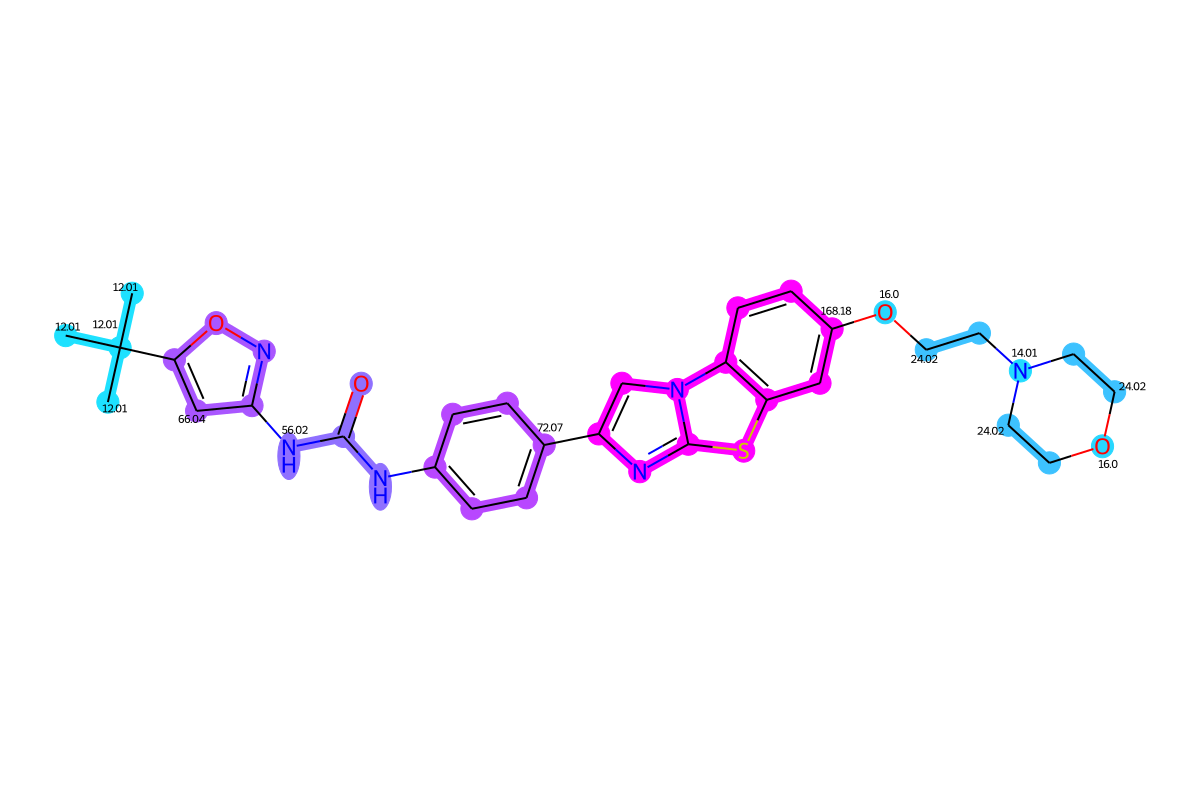

In [56]:
prettymol(mol, asMol=True, highlights=highlights, label='score', imgsize=(1200, 800), path='sample_mol.svg', score=tmp_score_map)